<a href="https://colab.research.google.com/github/FG2511/ARE/blob/master/ARE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparing the data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)
Training the model...
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 86s 4ms/step - loss: 0.4959 - acc: 0.7692 - val_loss: 0.3876 - val_acc: 0.8374
Epoch 2/10
20000/20000 [==============================] - 86s 4ms/step - loss: 0.3025 - acc: 0.8818 - val_loss: 0.3193 - val_acc: 0.8626
Epoch 3/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.2408 - acc: 0.9104 - val_loss: 0.3083 - val_acc: 0.8786
Epoch 4/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.2023 - acc: 0.9251 - val_loss: 0.2995 - val_acc: 0.8706
Epoch 5/10
20000/20000 [==============================] - 84s 4ms/step - loss: 0.1756 - acc: 0.9356 - val_loss: 0.3067 - val_acc: 0.8856
Epoch 6/10
20000/20000 [==============================] - 84s 4ms/step - loss: 0.1650

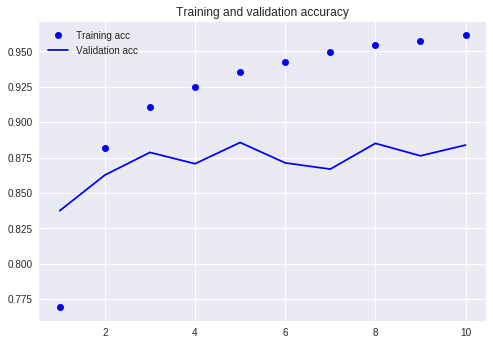

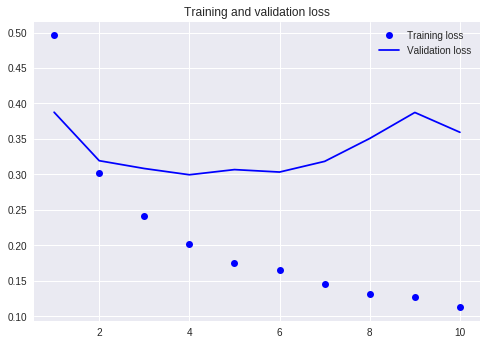

In [0]:
'''
@Created on 2018-12-14
@Authors: Federica Gerina, Francesca Moi, Silvia Maria Massa
@Description: Trying to figure how a NN works using the IMBD dataset
'''

from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

#FIRST STEP: PREPARING THE DATA
print("Preparing the data...")

max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

#SECOND STEP: TRAINING THE MODEL WITH LSTM
print("Training the model...")

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(input_train, y_train,epochs=10,batch_size=128, validation_split=0.2)

#THIRD STEP: PLOT RESULTS
print("Plot results...")

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

